In [391]:
import pandas as pd 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,roc_curve, roc_auc_score
import seaborn as sns
import numpy as np
import itertools
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import auc
from scipy import interp
import json
from collections import Counter
import pathlib

In [618]:
experiment = "base"

f = open(f"experiments/{experiment}.txt")
pathlib.Path(f"visualisations/{experiment}").mkdir(exist_ok=True)

# returns JSON object as
# a dictionary
data = json.load(f) # ids, labels, preds

test_df = pd.DataFrame(data,index=data['ids'])
test_df['ids'] = test_df['ids'].astype(str)
test_df.set_index('ids',drop=True,inplace=True)


# Test Class and Class prediction Distribution

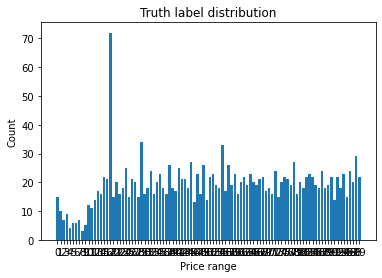

In [619]:
class_dic = dict(test_df.labels.value_counts())
class_dic = dict(sorted(class_dic.items()))
plt.bar([str(x) for x in class_dic.keys()],class_dic.values())
plt.ylabel('Count')
plt.xlabel('Price range')
plot_name = "Truth label distribution"
plt.title(f'{plot_name}')
plt.savefig(f'visualisations/{experiment}/{experiment} {plot_name}.pdf') 

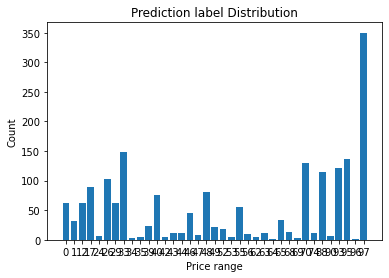

In [620]:
class_dic = dict(test_df.preds.value_counts())
class_dic = dict(sorted(class_dic.items()))

plt.bar([str(x) for x in class_dic.keys()],class_dic.values())
plt.ylabel('Count')
plt.xlabel('Price range')
plot_name = 'Prediction label Distribution'
plt.title(f'{plot_name}')
plt.savefig(f'visualisations/{experiment}/{experiment} {plot_name}.pdf') 

# Confusion Matrix

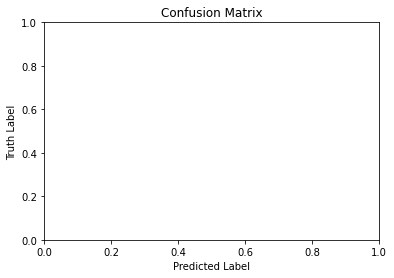

In [621]:
cm = confusion_matrix(test_df.labels.to_numpy(),test_df.preds.to_numpy(),normalize='true')
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cmap = "Blues" 
if experiment == 'b20':
    fig_dims = (11, 11)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.heatmap(cmn, annot=True, fmt='.2f',ax=ax,cmap=cmap)
if experiment == 'b100':
    pass
else:
    sns.heatmap(cmn, annot=True, fmt='.2f',cmap=cmap)

plt.ylabel('Truth Label')
plt.xlabel('Predicted Label')
plot_name = 'Confusion Matrix'

plt.title(f'{plot_name}')
plt.savefig(f'visualisations/{experiment}/{experiment} {plot_name}.pdf') 


# Classification Report

C:\Users\cawin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


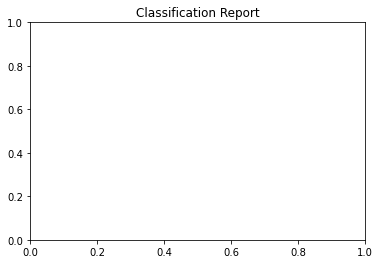

In [622]:
cr = classification_report(test_df.labels.to_numpy(),test_df.preds.to_numpy(), output_dict=True)
cmap = "Blues"
if experiment == 'b20':
    fig_dims = (11, 11)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True , vmin=0.4,cmap=cmap,ax=ax) 
if experiment == 'b100':
    pass
else:
    sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True , vmin=0.4,cmap=cmap) 
plot_name = 'Classification Report'
plt.title(f'{plot_name}')
plt.savefig(f'visualisations/{experiment}/{experiment} {plot_name}.pdf') 

# ROC Curve

In [623]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import auc
from scipy import interp



def plot_roc_curve_multiclass(y_true, y_pred, n_classes,class_names=None):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    print("AUC Score: ")
    print(roc_auc_score(np.array(pd.get_dummies(y_true)), np.array(pd.get_dummies(y_pred)), "macro",multi_class = 'ovr'))
    
    t1=sum(x==0 for x in y_pred-y_true)/len(y_pred)

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_true))[:, i], np.array(pd.get_dummies(y_pred))[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr['macro'] = all_fpr
    tpr['macro'] = mean_tpr
    roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

    lw=2
    plt.figure(figsize=(8,5))
    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='green', linestyle=':', linewidth=4)

    
    colors = itertools.cycle(['aqua', 'darkorange', 'red','lime','gold','blue','purple','crimson','green'])
    for i, color in zip(range(n_classes), colors):
        if class_names:
            plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                     label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(class_names[i], roc_auc[i]))
        else:
            plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.annotate('Random Guess',(.5,.48),color='red')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plot_name = 'Receiver Operating Characteristic'
    plt.title(f'{plot_name}')
    plt.savefig(f'visualisations/{experiment}/{experiment} {plot_name}.pdf') 
    plt.show()
    

In [624]:
plot_roc_curve_multiclass(test_df.labels.to_numpy(),test_df.preds.to_numpy(),len(test_df.labels.unique()))

AUC Score: 
0.4997754774961094


C:\Users\cawin\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass average=macro as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


IndexError: index 37 is out of bounds for axis 1 with size 37

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import os
# import json 
# import glob
# import seaborn as sns

# category = {'Async Music':"Music", 'Boonji Project':"Image", 'Bored Ape Yacht Club':"Image",
#             'VeeFriends':"Image", 'CryptoPunks':"Image", 'Doodles':"Image", 'EulerBeats Enigma':"Music",
#             'EulerBeats Genesis':"Music", 'Cryptoblots by Dam Aggott-Hnsch':"Image",
#             'JingleBe NFT COLLECTION':"Music", 'LOSTPOETS':"Image", 'NAMEWEE4896 Collection':"Music",
#             'Nifty Sax Spheres':"Music", 'Rarible':"*Marketplace (Rarible/Superrare)", 'Song A Day':"Video", '"I\'m Spottie"':"Music",
#             'SuperRare':"*Marketplace (Rarible/Superrare)", 'THE SHIBOSHIS':"Image"}


# df = pd.DataFrame()

# for json_files in glob.glob('data\preprocessed\json\*.json'):
#     if not df.empty:
#         temp = pd.read_json(json_files)
#         if len(temp) == 2:
#             temp.at[0,'media_filenames'] = [temp.iloc[0].media_filenames,temp.iloc[1].media_filenames]
#             temp.at[0,'ids'] = json_files.split("\\")[-1].replace('.json',"")
#         else:
#             temp.at[0,'ids'] = json_files.split("\\")[-1].replace('.json',"")
#         df = df.append(temp.head(1))
#     else:
#         temp = pd.read_json(json_files)
#         if len(temp) == 2:
#             temp.at[0,'media_filenames'] = [temp.iloc[0].media_filenames,temp.iloc[1].media_filenames]
#             temp.at[0,'ids'] = json_files.split("\\")[-1].replace('.json',"")
#         else:
#             temp.at[0,'ids'] = json_files.split("\\")[-1].replace('.json',"")
#         df = pd.DataFrame(temp.head(1))
# df.fillna('',inplace=True)
# df = df.astype({"name": str, "description": str, "collection_name": str, "collection_description":str})
# df['Category'] = df['collection_name'].apply(lambda x: category.get(x))
# df.set_index('ids',drop=True,inplace=True)

In [625]:
combined_df = test_df.merge(df, left_index=True, right_index=True)
combined_df['Price of NFT'] = (combined_df.eth_price*pd.to_numeric(combined_df.usd_price)*10**(-float(combined_df.eth_price_decimal.head(1))))
combined_df.Category.loc[combined_df.Category == '*Marketplace (Rarible/Superrare)'] = "Marketplace"
combined_df

C:\Users\cawin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,labels,preds,name,description,collection_name,collection_description,eth_price,eth_price_decimal,usd_price,usd_volume,usd_marketcap,transaction_time,media_filenames,has_audio_in_video,Category,Price of NFT
ids,,,,,,,,,,,,,,,,
6844,17,17,Don't Give in to Madness | Song A Day #00127,"Jonathan from 2009 says, ""I got a ton of reque...",Song A Day,### Hello! I'm Jonathan Mann! I've been writin...,1.000000e+17,18,1791.7,2.62447e+10,2.06162e+11,2021-03-15 19:10:27,data/preprocessed/media/tmp/6844.mp4,True,Video,179.170230
6898,17,17,Take Medium Steps | Song A Day #00181,"Jonathan from 2009 says, ""A bit of advice.""",Song A Day,### Hello! I'm Jonathan Mann! I've been writin...,1.000000e+17,18,1791.7,2.62447e+10,2.06162e+11,2021-03-15 19:23:26,data/preprocessed/media/tmp/6898.mp4,True,Video,179.170230
2924,93,97,CryptoPunk #3799,,CryptoPunks,"CryptoPunks launched as a fixed set of 10,000 ...",9.795000e+19,18,3270.6,1.84896e+10,3.83585e+11,2021-08-27 02:48:57,data/preprocessed/media/tmp/2924.jpg,False,Image,320355.270000
599,69,88,#188,,Bored Ape Yacht Club,The Bored Ape Yacht Club is a collection of 10...,8.690000e+18,18,2561.85,2.2698e+10,2.99565e+11,2021-08-01 16:23:36,data/preprocessed/media/tmp/599.jpg,False,Image,22262.476500
4406,98,93,CryptoPunk #6043,,CryptoPunks,"CryptoPunks launched as a fixed set of 10,000 ...",1.393600e+20,18,3928.84,5.05683e+10,4.54992e+11,2021-05-09 16:45:21,data/preprocessed/media/tmp/4406.jpg,False,Image,547523.798228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6925,17,17,Two Chords | Song A Day #00209,"Jonathan from 2009 says, ""What can I say with ...",Song A Day,### Hello! I'm Jonathan Mann! I've been writin...,1.000000e+17,18,1791.7,2.62447e+10,2.06162e+11,2021-03-15 19:19:12,data/preprocessed/media/tmp/6925.mp4,True,Video,179.170230
7165,29,29,The Jason Workout Song! | Song A Day #461,"""running around with friends trying to get in ...",Song A Day,### Hello! I'm Jonathan Mann! I've been writin...,1.200000e+17,18,3227,1.32966e+10,3.78559e+11,2021-08-29 20:38:35,data/preprocessed/media/tmp/7165.mp4,True,Video,387.240000
5456,22,33,Cryptoblots #445,A cryptoart collectible series to indulge the ...,Cryptoblots by Dam Aggott-Hnsch,Cryptoblots by Dam Aggott-Hnsch - Art Blocks C...,1.200000e+17,18,1781.99,4.24096e+10,2.04539e+11,2021-02-22 02:18:49,data/preprocessed/media/tmp/5456.jpg,False,Image,213.839157


C:\Users\cawin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Log prices of NFT')

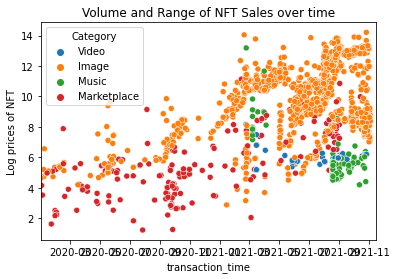

In [626]:
sns.scatterplot(combined_df.transaction_time,np.log(combined_df['Price of NFT']),hue=combined_df.Category).set(xlim=(combined_df.transaction_time.min(),combined_df.transaction_time.max()))
plt.title("Volume and Range of NFT Sales over time")
plt.ylabel("Log prices of NFT")

C:\Users\cawin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Log prices of NFT')

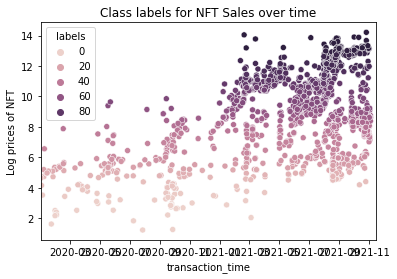

In [627]:
sns.scatterplot(combined_df.transaction_time,np.log(combined_df['Price of NFT']),hue=combined_df.labels).set(xlim=(combined_df.transaction_time.min(),combined_df.transaction_time.max()))
plt.title("Class labels for NFT Sales over time")
plt.ylabel("Log prices of NFT")


C:\Users\cawin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Log prices of NFT')

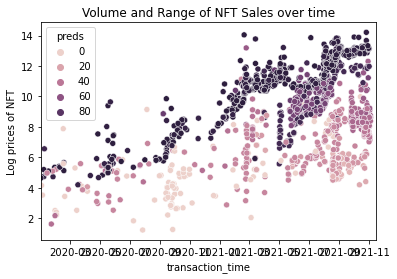

In [628]:
sns.scatterplot(combined_df.transaction_time,np.log(combined_df['Price of NFT']),hue=combined_df.preds).set(xlim=(combined_df.transaction_time.min(),combined_df.transaction_time.max()))
plt.title("Volume and Range of NFT Sales over time")
plt.ylabel("Log prices of NFT")

In [ ]:
combined_df.Category.unique()

array(['Video', 'Music', 'Image', 'Marketplace'], dtype=object)

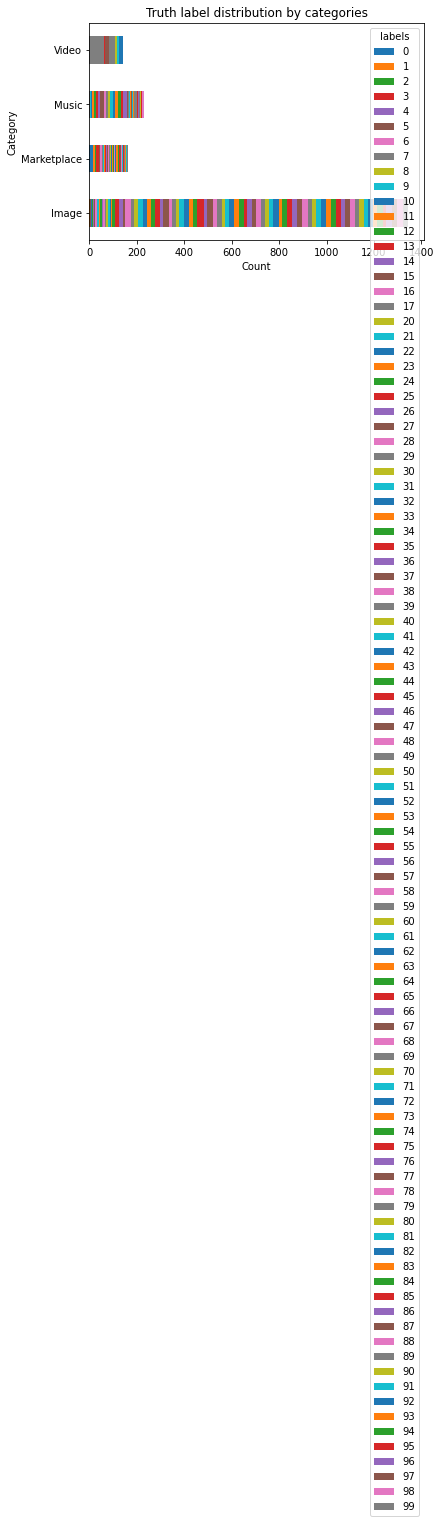

In [629]:
labels = pd.DataFrame(pd.DataFrame(zip(combined_df.Category,combined_df.labels),columns=['Category','labels']).value_counts(),columns=['Count']).unstack()
labels.columns = labels.columns.droplevel(level=0)
labels.plot(kind='barh', stacked=True)
plt.xlabel("Count")
plot_name = 'Truth label distribution by categories'
plt.title(f'{plot_name}')
plt.savefig(f'visualisations/{experiment}/{experiment} {plot_name}.pdf',bbox_inches='tight') 

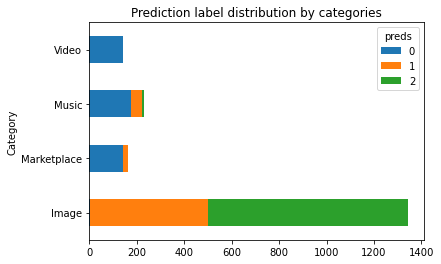

In [ ]:
preds = pd.DataFrame(pd.DataFrame(zip(combined_df.Category,combined_df.preds),columns=['Category','preds']).value_counts(),columns=['Count']).unstack()
preds.columns = preds.columns.droplevel(level=0)
preds.plot(kind='barh',stacked=True)
plot_name = "Prediction label distribution by categories"
plt.title(f'{plot_name}')
plt.savefig(f'visualisations/{experiment}/{experiment} {plot_name}.pdf',bbox_inches='tight') 

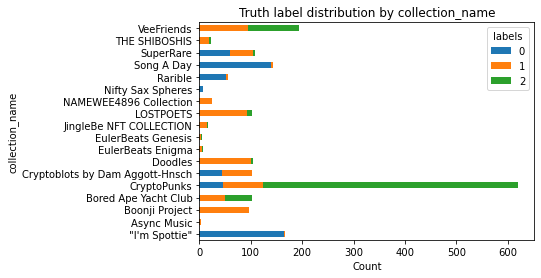

In [ ]:
labels = pd.DataFrame(pd.DataFrame(zip(combined_df.collection_name,combined_df.labels),columns=['collection_name','labels']).value_counts(),columns=['Count']).unstack()
labels.columns = labels.columns.droplevel(level=0)
labels.plot(kind='barh',stacked=True)
plt.xlabel("Count")
plot_name = "Truth label distribution by collection_name"
plt.title(f'{plot_name}')
plt.savefig(f'visualisations/{experiment}/{experiment} {plot_name}.pdf',bbox_inches='tight') 

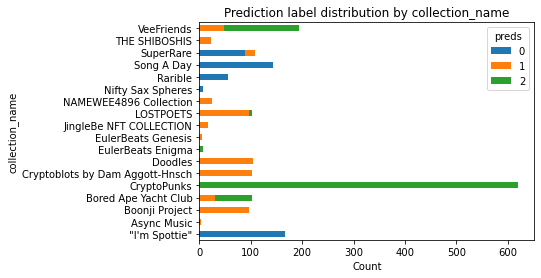

In [ ]:
preds = pd.DataFrame(pd.DataFrame(zip(combined_df.collection_name,combined_df.preds),columns=['collection_name','preds']).value_counts(),columns=['Count']).unstack()
preds.columns = preds.columns.droplevel(level=0)
preds.plot(kind='barh',stacked=True)
plt.xlabel("Count")
plot_name = "Prediction label distribution by collection_name"
plt.title(f'{plot_name}')
plt.savefig(f'visualisations/{experiment}/{experiment} {plot_name}.pdf',bbox_inches='tight') 